## Statistical inference

### P-value

Throw a coin 20 times, and calculate the p-value for the result obtained assuming the null hypothesis that the coin is fair.

Assuming a uniform prior on heads probability plot the posterior distribution. 

How many times you would have to throw the dice to get a test with power 95% assuming that the coin has 0.6 probabaility for coming up head and significance level of 5%.

### Bayes classifier

Please assume that average female height is a normally distributed random variable with mean of 68" (inches) standard deviation of 3.5". For male heights this is 70" and 4" respectively.

1. Assuming that women makeup 25% of the population at our faculty, calculate and plot the probability P(F|h) that given height a person is a women.
2. If we classify a person as women when P(F|h)>1/2 what is True Positives Rate and False Positives Rate?
3. Calculate and plot the whole ROC curve this classifier.
4. Assuming that "cost" od mistaking men for women is 2 and mistaking women for men is 3 what is the best classifier?

## Hypothesis testing

Hypothesis testing
Using Welch's t-test check if the two samples from files sample_1.txt and sample_1.txt were drawn from the distributions with equal means.

Knowing that the sample 1 comes from normal distribution with mean 0.5 and std 1 and sample 2 has mean 0.75 and sigma 0.75 calculate the power of the test.

Assuming samples of the same size how big this size must be to obtain 90% power with significance level of 1%?

In [1]:
from scipy.stats import binom
import random

# flips = [5, 5, 6, 2, 7, 2, 5, 6, 6, 7, 6, 6, 4, 8]
# extreme_flips = [flips]
# print(len(flips))
# [o, o, o, o, o, o, o, o, r, r]
def get_prob_for(flip_count, head_prob, head_count):
    result = 1
    tail_prob = 1 - head_prob
    tail_count = flip_count - head_count
    for i in range(head_count):
        result *= head_prob
    for i in range(tail_count):
        result *= tail_prob
    return result

def get_count_for(flip_count, head_count):
    result = silnia(flip_count) / (silnia(head_count)*silnia(flip_count-head_count))
    return result
#     return binom(flip_count, head_count)

    
#     result = 1
#     for i in (head_count, flip_count+1):
#         result *= i
#     return result

def silnia(k):
    result = 1
    for i in range(1,k+1):
        result *= i
    return result

def get_p_value_for(flip_count, head_count, head_prob):
    if flip_count == head_count*2:
        return 1
    if(head_count < flip_count/2):
        head_count = flip_count - head_count
    result = 0
    for i in range(head_count, flip_count+1):
        result += get_prob_for(flip_count, head_prob, i) * get_count_for(flip_count, i)
    return 2*result

def get_sample_data_with_prob(count, prob):
    result = 0
    for i in range(count):
        if random.random() < prob:
            result += 1
    return result
    

flip_count = 10
head_count = 8
head_prob = 0.5
p_value = get_p_value_for(flip_count, head_count, head_prob)
print(p_value)

0.109375


In [2]:
p_value1 = get_p_value_for(10, 8, 0.5)
p_value2 = get_p_value_for(10, 2, 0.5)
print(p_value1)
print(p_value2)

0.109375
0.109375


In [3]:
alpha = 0.05
head_prob = 0.6
test_power = 1000
for flip_count in range(5, 500):
    under_alpha_count = 0
    for i in range(test_power):
        head_count = get_sample_data_with_prob(flip_count, head_prob)
        p_value = get_p_value_for(flip_count, head_count, 0.5)
        if p_value < alpha:
#             print("WARNING")
            under_alpha_count += 1
    print("FLIP COUNT: "+str(flip_count)+", for "+str(test_power)+" attempts, " + str(under_alpha_count)+" were under p_value")    
#     print("FC: "+str(flip_count)+"\tHC: "+str(head_count)+"\tPV: "+str(p_value))

FLIP COUNT: 5, for 1000 attempts, 0 were under p_value
FLIP COUNT: 6, for 1000 attempts, 57 were under p_value
FLIP COUNT: 7, for 1000 attempts, 24 were under p_value
FLIP COUNT: 8, for 1000 attempts, 23 were under p_value
FLIP COUNT: 9, for 1000 attempts, 73 were under p_value
FLIP COUNT: 10, for 1000 attempts, 54 were under p_value
FLIP COUNT: 11, for 1000 attempts, 31 were under p_value
FLIP COUNT: 12, for 1000 attempts, 87 were under p_value
FLIP COUNT: 13, for 1000 attempts, 59 were under p_value
FLIP COUNT: 14, for 1000 attempts, 36 were under p_value
FLIP COUNT: 15, for 1000 attempts, 78 were under p_value
FLIP COUNT: 16, for 1000 attempts, 65 were under p_value
FLIP COUNT: 17, for 1000 attempts, 128 were under p_value
FLIP COUNT: 18, for 1000 attempts, 91 were under p_value
FLIP COUNT: 19, for 1000 attempts, 67 were under p_value
FLIP COUNT: 20, for 1000 attempts, 123 were under p_value
FLIP COUNT: 21, for 1000 attempts, 88 were under p_value
FLIP COUNT: 22, for 1000 attempts, 

FLIP COUNT: 146, for 1000 attempts, 660 were under p_value
FLIP COUNT: 147, for 1000 attempts, 692 were under p_value
FLIP COUNT: 148, for 1000 attempts, 640 were under p_value
FLIP COUNT: 149, for 1000 attempts, 694 were under p_value
FLIP COUNT: 150, for 1000 attempts, 667 were under p_value
FLIP COUNT: 151, for 1000 attempts, 628 were under p_value
FLIP COUNT: 152, for 1000 attempts, 672 were under p_value
FLIP COUNT: 153, for 1000 attempts, 654 were under p_value
FLIP COUNT: 154, for 1000 attempts, 660 were under p_value
FLIP COUNT: 155, for 1000 attempts, 653 were under p_value
FLIP COUNT: 156, for 1000 attempts, 703 were under p_value
FLIP COUNT: 157, for 1000 attempts, 664 were under p_value
FLIP COUNT: 158, for 1000 attempts, 712 were under p_value
FLIP COUNT: 159, for 1000 attempts, 667 were under p_value
FLIP COUNT: 160, for 1000 attempts, 726 were under p_value
FLIP COUNT: 161, for 1000 attempts, 684 were under p_value
FLIP COUNT: 162, for 1000 attempts, 760 were under p_val

FLIP COUNT: 285, for 1000 attempts, 920 were under p_value
FLIP COUNT: 286, for 1000 attempts, 900 were under p_value
FLIP COUNT: 287, for 1000 attempts, 913 were under p_value
FLIP COUNT: 288, for 1000 attempts, 914 were under p_value
FLIP COUNT: 289, for 1000 attempts, 920 were under p_value
FLIP COUNT: 290, for 1000 attempts, 903 were under p_value
FLIP COUNT: 291, for 1000 attempts, 921 were under p_value
FLIP COUNT: 292, for 1000 attempts, 922 were under p_value
FLIP COUNT: 293, for 1000 attempts, 936 were under p_value
FLIP COUNT: 294, for 1000 attempts, 930 were under p_value
FLIP COUNT: 295, for 1000 attempts, 928 were under p_value
FLIP COUNT: 296, for 1000 attempts, 927 were under p_value
FLIP COUNT: 297, for 1000 attempts, 925 were under p_value
FLIP COUNT: 298, for 1000 attempts, 911 were under p_value
FLIP COUNT: 299, for 1000 attempts, 954 were under p_value
FLIP COUNT: 300, for 1000 attempts, 931 were under p_value
FLIP COUNT: 301, for 1000 attempts, 932 were under p_val

KeyboardInterrupt: 

In [4]:
import numpy as np
def get_sample_data_with_prob(count, prob):
    result = np.random.binomial(count, prob, 1)
    return result[0]

In [5]:
def get_p_value_for2(flip_count, head_count_array, head_prob): 
    head_count_vector = get_array_vector(flip_count, head_count_array)
#     if flip_count == head_count*2:
#         return 1
#     result = 0
#     for i in range(head_count, flip_count+1):
#         result += get_prob_for(flip_count, head_prob, i) * get_count_for(flip_count, i)
#     return 2*result
    frequency_array = []
    tmp_result = 0
    for i in range(flip_count, int(flip_count/2), -1):
        tmp_result += get_prob_for(flip_count, head_prob, i) * get_count_for(flip_count, i)
        frequency_array.append(tmp_result*2)
    if flip_count % 2 == 0:
        frequency_array.append(1)
    result = []
    for key, count in head_count_vector:
        result.append((count, frequency_array[flip_count-key]))
#     print(result)
    return result
def get_array_vector(flip_count, head_count_array): #returns pair of key and count
    head_count_array = [flip_count - element if element*2 < flip_count else element for element in head_count_array]
    head_count_set = sorted(set(head_count_array))
    result = []
    for element in head_count_set:
        result.append((element, head_count_array.count(element)))
    return result
get_p_value_for2(7, [0,1,2,3,4,5,6,7], 0.5)

[(2, 1.0), (2, 0.453125), (2, 0.125), (2, 0.015625)]

In [6]:
alpha = 0.05
head_prob = 0.6
test_power = 1000
for flip_count in range(5, 500):
    under_alpha_count = 0
    result = 0
    p_value_vector = get_p_value_for2(flip_count, np.random.binomial(flip_count, head_prob, test_power), 0.5)
    for count, p_value in p_value_vector:
        if p_value < alpha:
            result += count
    print("FLIP COUNT: "+str(flip_count)+", for "+str(test_power)+" attempts, " + str(result)+" were under p_value")    


FLIP COUNT: 5, for 1000 attempts, 0 were under p_value
FLIP COUNT: 6, for 1000 attempts, 53 were under p_value
FLIP COUNT: 7, for 1000 attempts, 25 were under p_value
FLIP COUNT: 8, for 1000 attempts, 18 were under p_value
FLIP COUNT: 9, for 1000 attempts, 66 were under p_value
FLIP COUNT: 10, for 1000 attempts, 44 were under p_value
FLIP COUNT: 11, for 1000 attempts, 33 were under p_value
FLIP COUNT: 12, for 1000 attempts, 80 were under p_value
FLIP COUNT: 13, for 1000 attempts, 52 were under p_value
FLIP COUNT: 14, for 1000 attempts, 58 were under p_value
FLIP COUNT: 15, for 1000 attempts, 108 were under p_value
FLIP COUNT: 16, for 1000 attempts, 71 were under p_value
FLIP COUNT: 17, for 1000 attempts, 108 were under p_value
FLIP COUNT: 18, for 1000 attempts, 83 were under p_value
FLIP COUNT: 19, for 1000 attempts, 73 were under p_value
FLIP COUNT: 20, for 1000 attempts, 144 were under p_value
FLIP COUNT: 21, for 1000 attempts, 82 were under p_value
FLIP COUNT: 22, for 1000 attempts,

FLIP COUNT: 169, for 1000 attempts, 730 were under p_value
FLIP COUNT: 170, for 1000 attempts, 707 were under p_value
FLIP COUNT: 171, for 1000 attempts, 757 were under p_value
FLIP COUNT: 172, for 1000 attempts, 714 were under p_value
FLIP COUNT: 173, for 1000 attempts, 740 were under p_value
FLIP COUNT: 174, for 1000 attempts, 736 were under p_value
FLIP COUNT: 175, for 1000 attempts, 800 were under p_value
FLIP COUNT: 176, for 1000 attempts, 748 were under p_value
FLIP COUNT: 177, for 1000 attempts, 727 were under p_value
FLIP COUNT: 178, for 1000 attempts, 733 were under p_value
FLIP COUNT: 179, for 1000 attempts, 725 were under p_value
FLIP COUNT: 180, for 1000 attempts, 732 were under p_value
FLIP COUNT: 181, for 1000 attempts, 745 were under p_value
FLIP COUNT: 182, for 1000 attempts, 777 were under p_value
FLIP COUNT: 183, for 1000 attempts, 731 were under p_value
FLIP COUNT: 184, for 1000 attempts, 756 were under p_value
FLIP COUNT: 185, for 1000 attempts, 735 were under p_val

FLIP COUNT: 320, for 1000 attempts, 939 were under p_value
FLIP COUNT: 321, for 1000 attempts, 940 were under p_value
FLIP COUNT: 322, for 1000 attempts, 947 were under p_value
FLIP COUNT: 323, for 1000 attempts, 945 were under p_value
FLIP COUNT: 324, for 1000 attempts, 944 were under p_value
FLIP COUNT: 325, for 1000 attempts, 948 were under p_value
FLIP COUNT: 326, for 1000 attempts, 949 were under p_value
FLIP COUNT: 327, for 1000 attempts, 957 were under p_value
FLIP COUNT: 328, for 1000 attempts, 940 were under p_value
FLIP COUNT: 329, for 1000 attempts, 958 were under p_value
FLIP COUNT: 330, for 1000 attempts, 951 were under p_value
FLIP COUNT: 331, for 1000 attempts, 942 were under p_value
FLIP COUNT: 332, for 1000 attempts, 954 were under p_value
FLIP COUNT: 333, for 1000 attempts, 973 were under p_value
FLIP COUNT: 334, for 1000 attempts, 947 were under p_value
FLIP COUNT: 335, for 1000 attempts, 947 were under p_value
FLIP COUNT: 336, for 1000 attempts, 961 were under p_val

FLIP COUNT: 464, for 1000 attempts, 993 were under p_value
FLIP COUNT: 465, for 1000 attempts, 993 were under p_value
FLIP COUNT: 466, for 1000 attempts, 990 were under p_value
FLIP COUNT: 467, for 1000 attempts, 990 were under p_value
FLIP COUNT: 468, for 1000 attempts, 990 were under p_value
FLIP COUNT: 469, for 1000 attempts, 990 were under p_value
FLIP COUNT: 470, for 1000 attempts, 990 were under p_value
FLIP COUNT: 471, for 1000 attempts, 988 were under p_value
FLIP COUNT: 472, for 1000 attempts, 990 were under p_value
FLIP COUNT: 473, for 1000 attempts, 996 were under p_value
FLIP COUNT: 474, for 1000 attempts, 996 were under p_value
FLIP COUNT: 475, for 1000 attempts, 991 were under p_value
FLIP COUNT: 476, for 1000 attempts, 986 were under p_value
FLIP COUNT: 477, for 1000 attempts, 992 were under p_value
FLIP COUNT: 478, for 1000 attempts, 994 were under p_value
FLIP COUNT: 479, for 1000 attempts, 992 were under p_value
FLIP COUNT: 480, for 1000 attempts, 992 were under p_val

In [7]:
female_mean = 68
female_dev  = 3.5
male_mean   = 70
male_dev    = 4

female_distribution = np.random.normal(female_mean, female_dev, 1000)
male_distribution   = np.random.normal(male_mean,   male_dev,   1000)


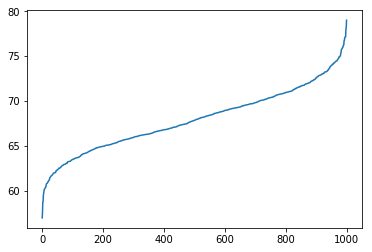

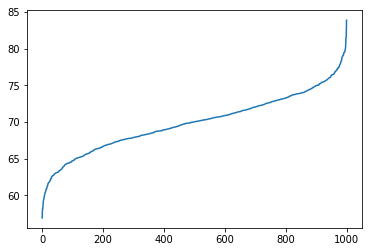

In [18]:
import matplotlib.pyplot as plt
plt.plot(female_distribution)
plt.show()
plt.plot(male_distribution)
plt.show()

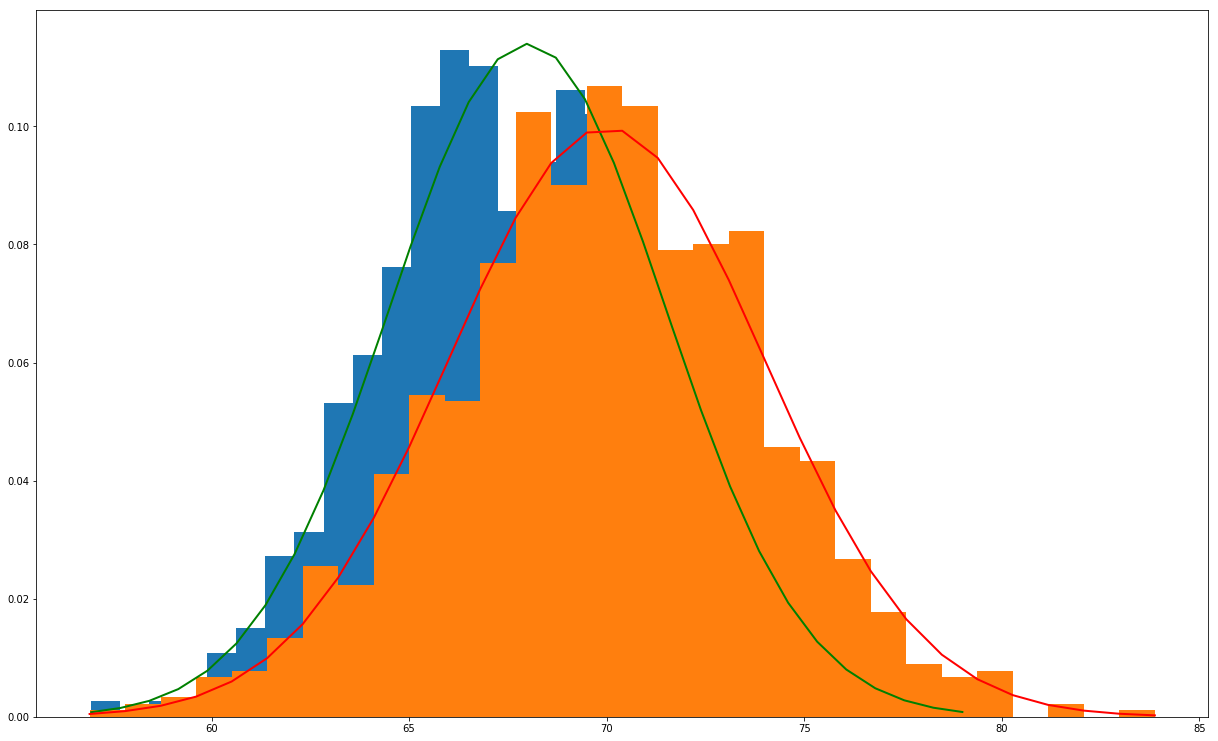

In [9]:
plt.figure(figsize=(21,13))
female_count, female_bins, female_ignored = plt.hist(female_distribution, 30, density=True)
plt.plot(female_bins, 1/(female_dev * np.sqrt(2 * np.pi)) *
          np.exp( - (female_bins - female_mean)**2 / (2 * female_dev**2) ),
          linewidth=2, color='g')
male_count, male_bins, male_ignored = plt.hist(male_distribution, 30, density=True)
plt.plot(male_bins, 1/(male_dev * np.sqrt(2 * np.pi)) *
          np.exp( - (male_bins - male_mean)**2 / (2 * male_dev**2) ),
          linewidth=2, color='r')
plt.show()

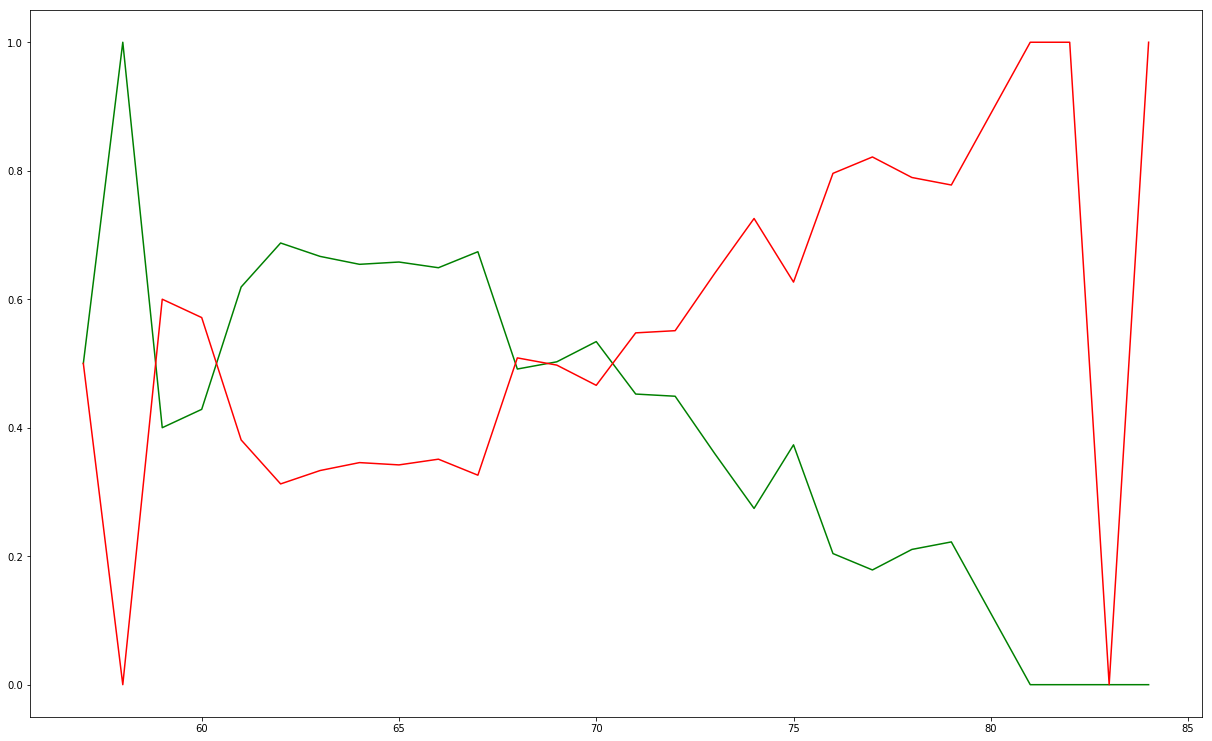

In [10]:
female_distribution = sorted(female_distribution)
male_distribution   = sorted(male_distribution)
female_index = 0
male_index   = 0
height_array = []
female_height_array = []
male_height_array   = []
female_prob_array   = []
male_prob_array     = []
height_range = np.arange(round(female_distribution[0], 1), round(male_distribution[len(male_distribution)-1]+1, 1), 1)

for i in height_range:
    female_count = 0
    male_count   = 0
    while female_index < len(female_distribution) and female_distribution[female_index] <= i:
        female_count += 1
        female_index += 1
    while male_index < len(male_distribution) and male_distribution[male_index] <= i:
        male_count += 1
        male_index += 1
    height_array.append(i)
    female_height_array.append(female_count)
    male_height_array  .append(male_count)
    if(female_count + male_count == 0):
        female_prob_array.append(0)
        male_prob_array  .append(0)
    else:
        female_prob_array.append(female_count/(female_count + male_count))
        male_prob_array  .append(male_count/(female_count + male_count))
plt.figure(figsize=(21,13))
plt.plot(height_array, female_prob_array, color="g")
plt.plot(height_array, male_prob_array, color="r")

In [11]:
def get_prediction(height, prob_treshold):
    index = 0
    while height_array[index] < height:
        index += 1
    index -= 1
    if female_prob_array[index] >= prob_treshold:
        return 'f'
    else:
        return 'm'

In [12]:
def get_tpr(prob_treshold):
    false_positive = 0
    true_positive  = 0
    for element in female_distribution:
        if(get_prediction(element, prob_treshold) == 'f'):
            true_positive += 1
        else:
            false_positive += 1
#     for element in male_distribution:
#         if(get_prediction(element, prob_treshold) == 'm'):
#             true_positive += 1
#         else:
#             false_positive += 1
#     print("true positives rate: "+str(true_positive/(len(female_distribution) + len(male_distribution))*100)+
#           "%, false positive rate: "+str(false_positive/(len(female_distribution) + len(male_distribution))*100)+"%.")
#     return true_positive/(len(female_distribution) + len(male_distribution))
    return true_positive/len(female_distribution)

In [13]:
print(get_tpr(0.43))

0.902


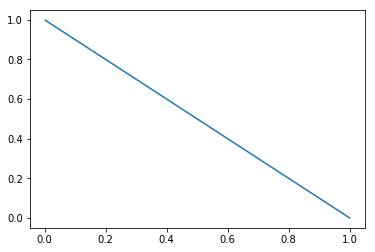

In [14]:
z
tpr_array = []
fpr_array = []
for treshold in treshold_range:
    tpr = get_tpr(treshold)
    tpr_array.append(tpr)
    fpr_array.append(1 - tpr)
# tpr_array = tpr_array[::-1]
# fpr_array = fpr_array[::-1]
plt.plot(tpr_array, fpr_array)

In [15]:
# https://www.medcalc.org/manual/roc-curves.php

min_value = min([min(female_distribution),min(male_distribution)])
max_value = max([max(female_distribution),max(male_distribution)])
value_range = max_value - min_value
tp_array = []
fp_array = []
tn_array = []
fn_array = []

tpr_array = []
fpr_array = []

def get_prediction2(height, treshold_value):
    if height < treshold_value:
        return 'f'
    else:
        return 'm'

def get_classification_stats(treshold): #treshold in range [0,1]
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    treshold_value = min_value + (treshold * value_range)
    for element in female_distribution:
        if(get_prediction2(element, treshold_value) == 'f'):
            tp += 1
        else:
            fn += 1
    for element in male_distribution:
        if(get_prediction2(element, treshold_value) == 'm'):
            tn += 1
        else:
            fp += 1
    tp_array.append(tp)
    fp_array.append(fp)
    tn_array.append(tn)
    fn_array.append(fn)
    
    tpr_array.append(tp/(tp+fn))
    fpr_array.append(1-(tn/(fp+tn)))

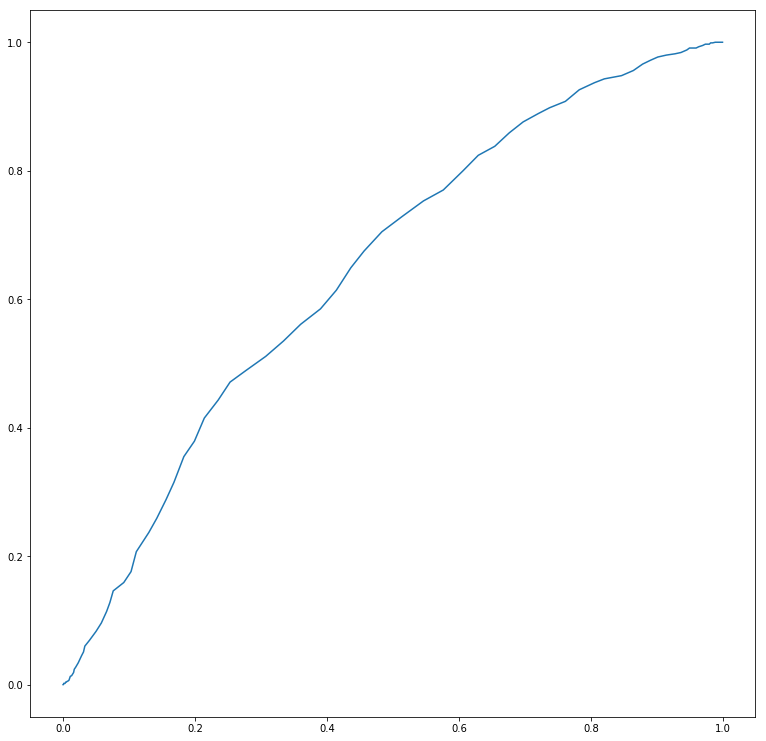

In [16]:
for treshold in treshold_range:
    get_classification_stats(treshold)

plt.figure(figsize=(13,13))
plt.plot(fpr_array, tpr_array)

56
72.01286245957921


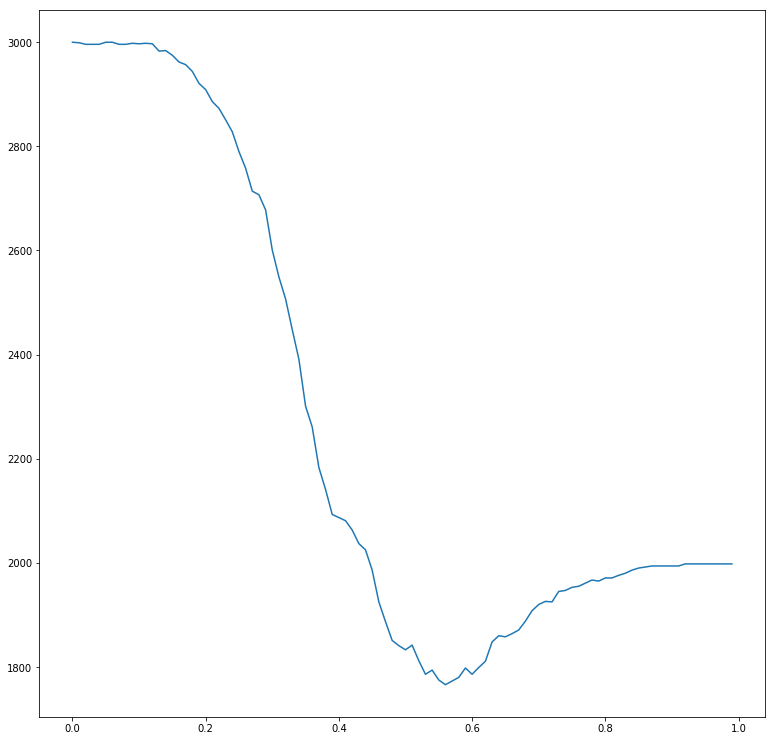

In [17]:
cumulated_cost = []
minimum_cost_index = 0
for i in range(0, len(fp_array)):
    cumulated_cost.append(2*fp_array[i] + 3*fn_array[i])
    if cumulated_cost[minimum_cost_index] > cumulated_cost[len(cumulated_cost)-1]:
        minimum_cost_index = len(cumulated_cost)-1

minimum_cost_treshold_value = min_value + (treshold_range[minimum_cost_index] * value_range)
print(minimum_cost_index)
print(minimum_cost_treshold_value)

plt.figure(figsize=(13,13))
plt.plot(treshold_range, cumulated_cost)
